In [1]:
import principal_portfolios as pp
import utils
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# FX DATA:

In [2]:
# Importing spot data of developed currencies
data_to_read_address = ["data/FX/Single/developed_countries_spot_monthly_1996_2024.xlsx",
                        "data/FX/Single/developed_countries_futures_monthly_1996_2024.xlsx"]
dataset_spot = data_to_read_address[0]
dataset_futures = data_to_read_address[1]

developed_countries_spot_monthly = utils.process_fx_single_currency_dataset(dataset_spot)
developed_countries_futures_monthly = utils.process_fx_single_currency_dataset(dataset_futures)

developed_countries_simple_return_monthly = utils.calculate_log_FX_excess_returns(developed_countries_spot_monthly,developed_countries_spot_monthly)

## Momentum as signal

dict_keys(['developed_countries_excess_returns_momentum_monthly'])
dict_keys(['realized_returns_df', 'sharpe_df', 'pp_realized_mean_df', 'pp_expected_mean_df', 'pep_realized_mean_df', 'pep_expected_mean_df', 'pap_realized_mean_df', 'pap_expected_mean_df'])
return_of_simple_factor           0.041198
realized_return_of_first_n_PP    -0.001932
realized_return_of_first_n_PEP    0.005178
realized_return_of_first_n_PAP    0.294321
realized_return_of_1_PP          -0.280189
realized_return_of_1_PEP         -0.108554
realized_return_of_2_PP           0.225832
realized_return_of_2_PEP          0.202644
realized_return_of_3_PP          -0.001542
realized_return_of_3_PEP         -0.315892
realized_return_of_4_PP          -0.289695
realized_return_of_4_PEP         -0.084345
realized_return_of_5_PP           0.090953
realized_return_of_5_PEP          0.079507
realized_return_of_6_PP          -0.011128
realized_return_of_6_PEP         -0.021070
realized_return_of_7_PP           0.197178
realized_ret

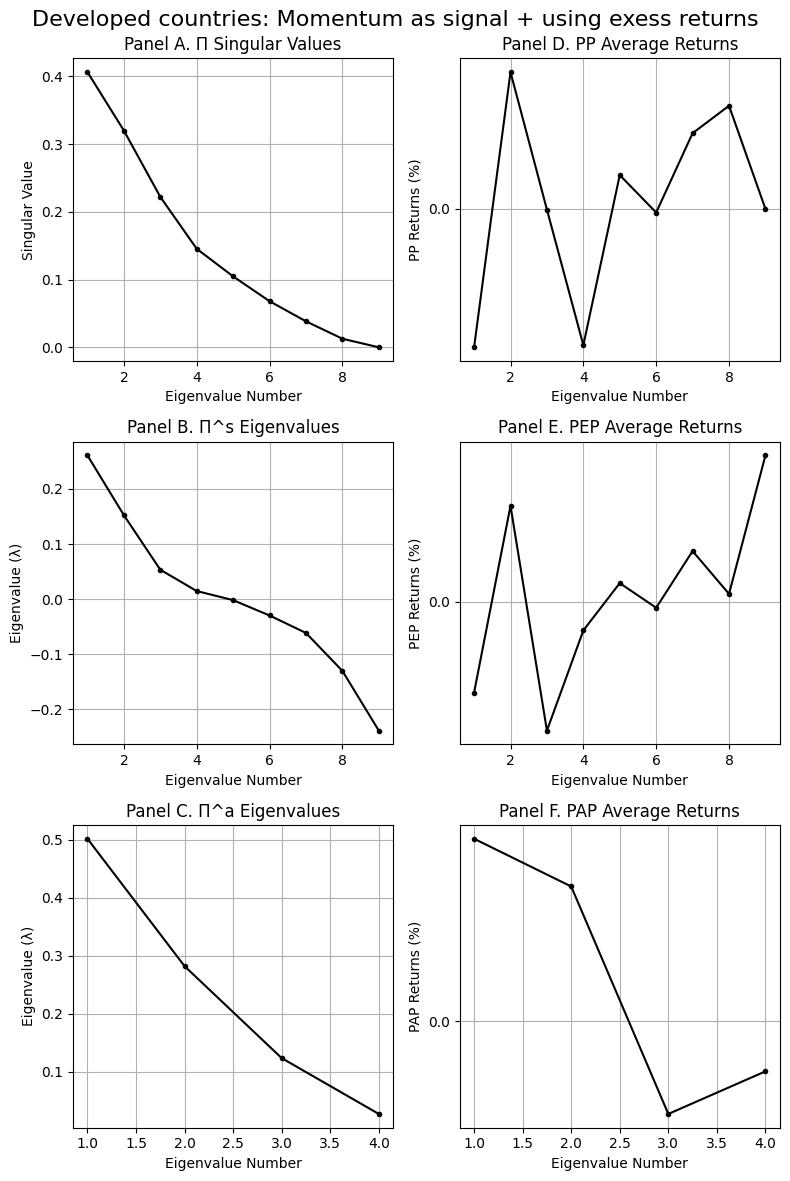

In [3]:
starting_year_to_filter = 1996
end_year_to_filter = 2024
number_of_lookback_periods = 90
number_of_PPs_to_consider = 2
number_of_PEPs_to_consider = 2
number_of_PAPs_to_consider = 2
output_dict_momentum = {}

developed_countries_excess_return_monthly = utils.calculate_log_FX_excess_returns(developed_countries_spot_monthly,developed_countries_futures_monthly)
# using past month's momentum as the signal
signal_df = utils.build_signal_df_for_1month_momentum(developed_countries_excess_return_monthly)
portfolios_key = "developed_countries_excess_returns_momentum_monthly"
output_dict_momentum[portfolios_key] = pp.build_PP(developed_countries_excess_return_monthly,signal_df,
                                                                   number_of_lookback_periods,starting_year_to_filter,end_year_to_filter,
                                                                   factor_data_monthly=None, number_of_PPs_to_consider=number_of_PPs_to_consider,
                                                                   number_of_PEPs_to_consider=number_of_PEPs_to_consider, 
                                                                   number_of_PAPs_to_consider= number_of_PAPs_to_consider)

# I calculate the results for all datasets. the results are stored in this dictionay.
print(output_dict_momentum.keys())
'''
Every value of this dictionary is itself another dictionary.
For instance the key 'sharpe_df' can be used to access the sharp values of this set of results.
'''
print(output_dict_momentum[portfolios_key].keys())
print(output_dict_momentum[portfolios_key]["sharpe_df"])

number_of_portfolios = developed_countries_excess_return_monthly.shape[1]
title = 'Developed countries: Momentum as signal + using exess returns'

pp.singular_values_vs_realized_returns_graph(output_dict_momentum, portfolios_key, number_of_portfolios, title)

## Carry as signal

dict_keys(['developed_countries_excess_returns_carry_monthly'])
dict_keys(['realized_returns_df', 'sharpe_df', 'pp_realized_mean_df', 'pp_expected_mean_df', 'pep_realized_mean_df', 'pep_expected_mean_df', 'pap_realized_mean_df', 'pap_expected_mean_df'])
return_of_simple_factor           0.171704
realized_return_of_first_n_PP    -0.301775
realized_return_of_first_n_PEP   -0.128154
realized_return_of_first_n_PAP   -0.364440
realized_return_of_1_PP          -0.082947
realized_return_of_1_PEP         -0.044855
realized_return_of_2_PP          -0.616141
realized_return_of_2_PEP         -0.234998
realized_return_of_3_PP          -0.223722
realized_return_of_3_PEP          0.190171
realized_return_of_4_PP           0.237982
realized_return_of_4_PEP          0.300383
realized_return_of_5_PP           0.077464
realized_return_of_5_PEP         -0.058143
realized_return_of_6_PP          -0.213886
realized_return_of_6_PEP          0.266381
realized_return_of_7_PP          -0.103441
realized_return

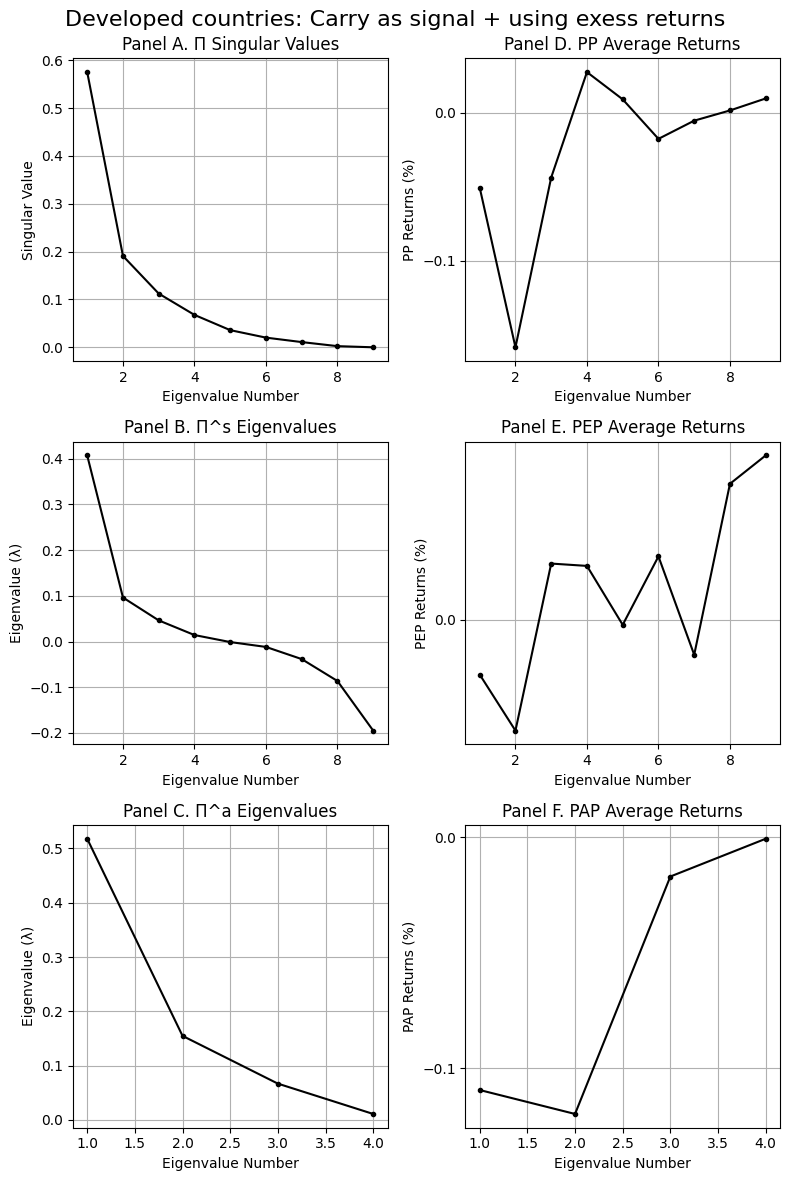

In [4]:
starting_year_to_filter = 1996
end_year_to_filter = 2024
number_of_lookback_periods = 60
number_of_PPs_to_consider = 2
number_of_PEPs_to_consider = 2
number_of_PAPs_to_consider = 2
output_dict_carry = {}

#developed_countries_excess_return_monthly = utils.calculate_log_FX_excess_returns(developed_countries_spot_monthly,developed_countries_futures_monthly)
# using past month's momentum as the signal
signal_df = utils.calculate_fx_carry_signal(developed_countries_spot_monthly,developed_countries_futures_monthly)
portfolios_key = "developed_countries_excess_returns_carry_monthly"
output_dict_carry[portfolios_key] = pp.build_PP(developed_countries_excess_return_monthly,signal_df,
                                                                   number_of_lookback_periods,starting_year_to_filter,end_year_to_filter,
                                                                   factor_data_monthly=None, number_of_PPs_to_consider=number_of_PPs_to_consider,
                                                                   number_of_PEPs_to_consider=number_of_PEPs_to_consider, 
                                                                   number_of_PAPs_to_consider= number_of_PAPs_to_consider)

# I calculate the results for all datasets. the results are stored in this dictionay.
print(output_dict_carry.keys())
'''
Every value of this dictionary is itself another dictionary.
For instance the key 'sharpe_df' can be used to access the sharp values of this set of results.
'''
print(output_dict_carry[portfolios_key].keys())
print(output_dict_carry[portfolios_key]["sharpe_df"])

number_of_portfolios = developed_countries_excess_return_monthly.shape[1]
title = 'Developed countries: Carry as signal + using exess returns'

pp.singular_values_vs_realized_returns_graph(output_dict_carry, portfolios_key, number_of_portfolios, title)

### Value (5-year reversal) as signal

dict_keys(['developed_countries_excess_returns_value_monthly'])
dict_keys(['realized_returns_df', 'sharpe_df', 'pp_realized_mean_df', 'pp_expected_mean_df', 'pep_realized_mean_df', 'pep_expected_mean_df', 'pap_realized_mean_df', 'pap_expected_mean_df'])
return_of_simple_factor           0.408623
realized_return_of_first_n_PP     0.180100
realized_return_of_first_n_PEP    0.023614
realized_return_of_first_n_PAP    0.181480
realized_return_of_1_PP           0.089463
realized_return_of_1_PEP          0.049056
realized_return_of_2_PP           0.195210
realized_return_of_2_PEP         -0.013826
realized_return_of_3_PP          -0.309603
realized_return_of_3_PEP          0.610500
realized_return_of_4_PP           0.600822
realized_return_of_4_PEP          0.633118
realized_return_of_5_PP           0.389182
realized_return_of_5_PEP         -0.041148
realized_return_of_6_PP           0.381144
realized_return_of_6_PEP          0.041826
realized_return_of_7_PP           0.689809
realized_return

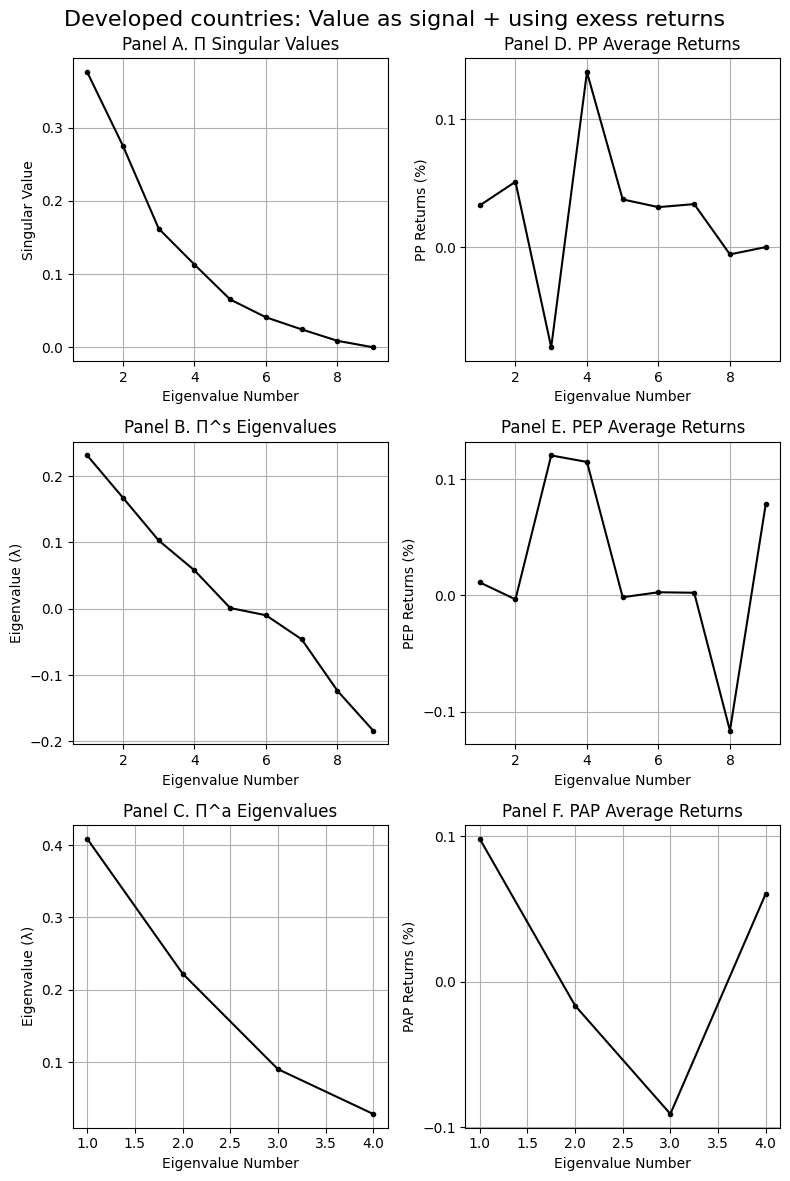

In [5]:
starting_year_to_filter = 1996
end_year_to_filter = 2024
number_of_lookback_periods = 120
number_of_PPs_to_consider = 2
number_of_PEPs_to_consider = 2
number_of_PAPs_to_consider = 2
output_dict_value = {}

#developed_countries_excess_return_monthly = utils.calculate_log_FX_excess_returns(developed_countries_spot_monthly,developed_countries_futures_monthly)
# using past month's momentum as the signal
signal_df = utils.compute_period_returns(developed_countries_spot_monthly,60)
portfolios_key = "developed_countries_excess_returns_value_monthly"
output_dict_value[portfolios_key] = pp.build_PP(developed_countries_excess_return_monthly,signal_df,
                                                                   number_of_lookback_periods,starting_year_to_filter,end_year_to_filter,
                                                                   factor_data_monthly=None, number_of_PPs_to_consider=number_of_PPs_to_consider,
                                                                   number_of_PEPs_to_consider=number_of_PEPs_to_consider, 
                                                                   number_of_PAPs_to_consider= number_of_PAPs_to_consider)

# I calculate the results for all datasets. the results are stored in this dictionay.
print(output_dict_value.keys())
'''
Every value of this dictionary is itself another dictionary.
For instance the key 'sharpe_df' can be used to access the sharp values of this set of results.
'''
print(output_dict_value[portfolios_key].keys())
print(output_dict_value[portfolios_key]["sharpe_df"])

number_of_portfolios = developed_countries_excess_return_monthly.shape[1]
title = 'Developed countries: Value as signal + using exess returns'

pp.singular_values_vs_realized_returns_graph(output_dict_value, portfolios_key, number_of_portfolios, title)

In [6]:
momentum_df = output_dict_momentum['developed_countries_excess_returns_momentum_monthly']["realized_returns_df"]
carry_df = output_dict_carry['developed_countries_excess_returns_carry_monthly']["realized_returns_df"]
value_df = output_dict_value['developed_countries_excess_returns_value_monthly']["realized_returns_df"]

### Average over signals

In [ ]:
print("average first n PAP:",pp.calculate_sharpe_ratio(0.5 * (output_dict_carry['developed_countries_excess_returns_carry_monthly']["realized_returns_df"]['realized_return_of_first_n_PAP'] + output_dict_momentum['developed_countries_excess_returns_momentum_monthly']["realized_returns_df"]['realized_return_of_first_n_PAP'])) * math.sqrt(12))
print("average PEP and PAP 1-n:",pp.calculate_sharpe_ratio(0.5 * (output_dict_carry['developed_countries_excess_returns_carry_monthly']["realized_returns_df"]['PEP and PAP 1-n'] + output_dict_momentum['developed_countries_excess_returns_momentum_monthly']["realized_returns_df"]['PEP and PAP 1-n'])) * math.sqrt(12))
print("average simple factors:",pp.calculate_sharpe_ratio(0.5 * (output_dict_carry['developed_countries_excess_returns_carry_monthly']["realized_returns_df"]['return_of_simple_factor'] + output_dict_momentum['developed_countries_excess_returns_momentum_monthly']["realized_returns_df"]['return_of_simple_factor'])) * math.sqrt(12))

average first n PAP: -0.19450681941714357
average PEP and PAP 1-n: -0.19062970288611314
average simple factors: 0.16196026799680402


In [8]:
print("average first n PAP:",pp.calculate_sharpe_ratio(1/3 * (output_dict_value['developed_countries_excess_returns_value_monthly']["realized_returns_df"]['realized_return_of_first_n_PAP']+output_dict_carry['developed_countries_excess_returns_carry_monthly']["realized_returns_df"]['realized_return_of_first_n_PAP'] + output_dict_momentum['developed_countries_excess_returns_momentum_monthly']["realized_returns_df"]['realized_return_of_first_n_PAP'])) * math.sqrt(12))
print("average PEP and PAP 1-n:",pp.calculate_sharpe_ratio(1/3 * (output_dict_value['developed_countries_excess_returns_value_monthly']["realized_returns_df"]['PEP and PAP 1-n'] +output_dict_carry['developed_countries_excess_returns_carry_monthly']["realized_returns_df"]['PEP and PAP 1-n'] + output_dict_momentum['developed_countries_excess_returns_momentum_monthly']["realized_returns_df"]['PEP and PAP 1-n'])) * math.sqrt(12))
print("average simple factors:",pp.calculate_sharpe_ratio(1/3 * (output_dict_value['developed_countries_excess_returns_value_monthly']["realized_returns_df"]['return_of_simple_factor'] + output_dict_carry['developed_countries_excess_returns_carry_monthly']["realized_returns_df"]['return_of_simple_factor'] + output_dict_momentum['developed_countries_excess_returns_momentum_monthly']["realized_returns_df"]['return_of_simple_factor'])) * math.sqrt(12))

average first n PAP: 0.021381948659025526
average PEP and PAP 1-n: -0.05514937236703329
average simple factors: 0.324646437708468


#### What is the Sharpe ratio of an equal weighted portfolio of developed currencies?

In [9]:
pp.calculate_sharpe_ratio(developed_countries_excess_return_monthly.iloc[:,1:].mean(axis=1)) * math.sqrt(12)

-0.09373557257946748

#### What is the Sharpe ratio of each individual currency among developed currencies?

In [10]:
developed_countries_excess_return_monthly.iloc[:,1:].apply(lambda col: pp.calculate_sharpe_ratio(col)) * math.sqrt(12)

AUD    0.073073
CAD   -0.001781
EUR   -0.111924
JPY   -0.318697
NZD    0.118701
NOK   -0.112533
SEK   -0.187849
CHF   -0.042767
GBP   -0.063128
dtype: float64